# Implementing PCA in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import datasets

## 1. Introduction to Implementing PCA

**Task 1**  
- A file named `Dry_Bean.csv` is loaded for you as a Pandas DataFrame named `df`. 
- Print the head of the DataFrame. 
- Note that all the columns are numerical except for the `Class` column.

<br>

**Task 2**  
- Extract the numerical features from `df` by dropping the `'Class'` column, and save them as a new DataFrame called `data_matrix`. 
- Uncomment the code to print `data_matrix`.

In [2]:
# Read the csv data as a DataFrame
df = pd.read_csv('Dry_Bean.csv')

# Remove null and na values
df.dropna()

# 1. Print the DataFrame head
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.iloc[:,-1].value_counts()    # Class column

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [4]:
# 2. Extract the numerical columns
data_matrix = df.iloc[:, :-1]

# Extract the classes
classes = df['Class']

data_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


## 2. Implementing PCA in NumPy I

**Task 1**  
- The DataFrame that you created in the previous exercise, `data_matrix`, is loaded for you. 
- Find the correlation matrix for the features in `data_matrix` and save the result as `correlation_matrix`.
- Uncomment the lines that show the heatmap and notice that there are pairs of features with very high correlations.

<br>

**Task 2**  
- Using the `correlation_matrix`, find the eigenvalues and eigenvectors using the NumPy method `np.linalg.eig()`. 
- Save them as `eigenvalues` and `eigenvectors`, respectively, then print them out.
- You should see that `eigenvalues` contains 16 numbers, while `eigenvectors` contains 16 vectors with 16 values, each.


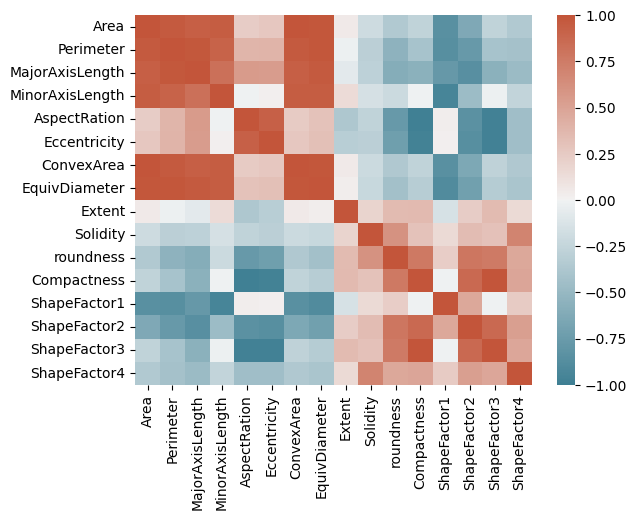

eigenvectors: 
[[ 2.82457959e-01  2.45882017e-01 -6.14466787e-02 -3.15461931e-02
  -9.13256234e-02 -3.66390029e-01  1.25044861e-01  7.17479179e-02
   3.50665669e-02 -3.90419516e-01 -1.77686475e-01  5.44842282e-02
   4.62948861e-02  6.55727948e-01  2.31435926e-01  1.33190281e-01]
 [ 3.10891123e-01  1.79302922e-01 -1.88525952e-02 -4.24678975e-02
   8.18198663e-02 -1.02508210e-02  8.15296990e-02  3.17295058e-02
  -1.57501171e-01  3.44383066e-01  1.99453621e-01 -7.50549982e-01
   3.17920275e-01  8.13901113e-02  1.46143834e-02  1.26584691e-02]
 [ 3.25823976e-01  1.00756516e-01 -8.46919067e-02 -6.79308126e-03
  -4.42163116e-02 -1.49091929e-02  1.18162546e-01 -2.00947006e-01
  -3.52366452e-01  1.01996482e-01  1.73639683e-01  2.73549959e-02
  -6.85301970e-01 -1.86251185e-01  3.46019418e-01  1.74431583e-01]
 [ 2.36199383e-01  3.43460651e-01  7.50039030e-03 -6.12997105e-02
  -4.29258549e-03 -2.78820146e-02 -6.23528140e-02  9.47252766e-02
   4.14230636e-01  4.81150315e-01  4.73720993e-03  4.13935

In [ ]:
data_matrix = pd.read_csv('data_matrix.csv')

# 1. Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

## Heatmap code:
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue)
plt.show()

# 2. Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)


# 3. Print out the eigenvectors and eigenvalues
print('eigenvectors: ')
print(eigenvectors) # 16 vectors with 16 values each

print('eigenvalues: ')
print(eigenvalues)  # 16 values


## 3. Implementing PCA in NumPy II - Analysis

**Task 1**  
- The array of `eigenvalues` is loaded for you. Find the proportion of each eigenvalue compared to the sum of the eigenvalues. 
- Save the results as an array named `info_prop`.
- Then, uncomment the plotting code below to generate a scree plot. 
- Notice that the first principal axes contain nearly 50% of the information!

<br>

**Task 2**  
- Using `info_prop`, calculate the cumulative sum of the information proportions. 
- Save the resulting array as `cum_info_prop`.
- Then, uncomment the plotting code, which generates a plot of the cumulative proportion of information explained. 
- Notice how four principal components describe about 95% of the information in the data.

Info Prop:
[5.54664386e-01 2.64309732e-01 8.00656422e-02 5.11408029e-02
 2.73929290e-02 1.14976093e-02 6.97650724e-03 3.25082500e-03
 5.16266295e-04 9.08681206e-05 6.58867938e-05 1.83739336e-05
 9.29966038e-06 6.25641678e-07 1.34132086e-07 1.11549485e-07]


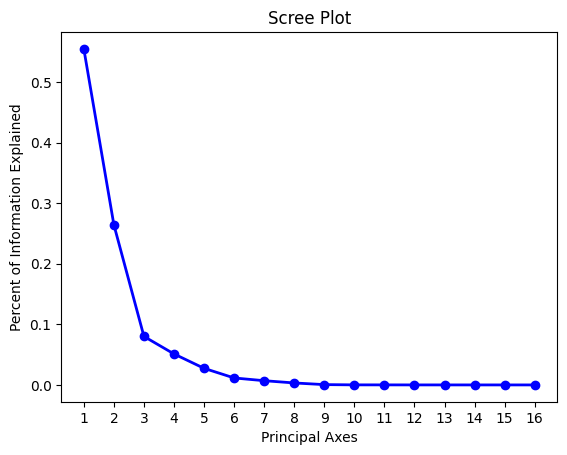

In [25]:
eigenvalues = pd.read_csv('eigenvalues.csv')['eigenvalues'].values

# 1. Find the proportion of information for each eigenvector, which is equal to the eigenvalues divided by the sum of all eigenvalues
info_prop = eigenvalues / eigenvalues.sum() # eigenvalues.sum() is the total variance, here it is 16
print("Info Prop:")
print(info_prop)

# Plot the principal axes vs the information proportions for each principal axis
plt.plot(np.arange(1,len(info_prop)+1),info_prop, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Percent of Information Explained')
plt.show()

Cumulative Info Prop:
[0.55466439 0.81897412 0.89903976 0.95018056 0.97757349 0.9890711
 0.99604761 0.99929843 0.9998147  0.99990557 0.99997146 0.99998983
 0.99999913 0.99999975 0.99999989 1.        ]


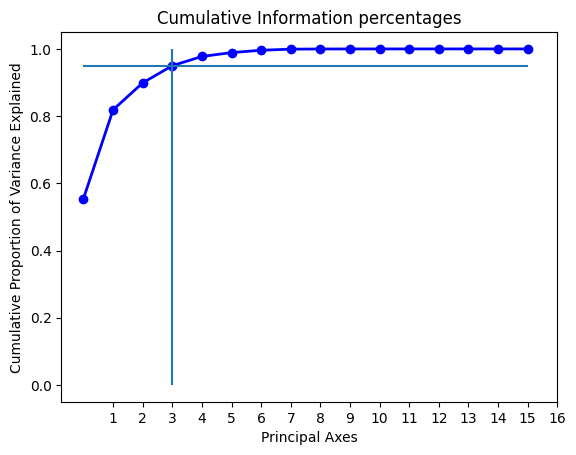

In [26]:
# 2. Find the cumulative sum of the proportions
cum_info_prop = np.cumsum(info_prop)
print("Cumulative Info Prop:")
print(cum_info_prop)

# Plot the cumulative proportions array
plt.plot(cum_info_prop, 'bo-', linewidth=2)
plt.hlines(y=.95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=1)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

## 4. Implementing PCA using Scikit-Learn

**Task 1**  
- The data matrix is loaded for you as `data_matrix`. 
- Standardize (*Z-Score*) all of the columns in the data matrix and save the result as `data_matrix_standardized`, then print out the first 5 rows to inspect it.

<br>

**Task 2**  
- Will we now use the PCA module from `sklearn.decomposition.PCA` to calculate the principal components (eigenvectors) for the standardized data matrix.
- Fit and calculate the principal components using the `fit()` method and `components_` attribute. 
- Save the results as `components` and then uncomment the code to transpose, index, and print the components/eigenvectors.
- You should see 16 eigenvectors. Each one should have a value (or weight) for the each of the 16 original features.

<br>

**Task 3**  
- Using the same `pca` object from the previous checkpoint, we can retrieve the variance (information) ratios for each principal component using the `explained_variance_ratio_` property.
- Save the variance ratios as `var_ratio` and then uncomment the code to re-save the values as a DataFrame and print them out.
- Are they consistent with our original finding that the first four components account for about 95% of the information in the data?

In [27]:
data_matrix = pd.read_csv('data_matrix.csv')

# 1. Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd  # Z-score standardization
data_matrix_standardized.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840718,-1.143277,-1.306550,-0.631130,-1.564995,-2.185640,-0.841420,-1.063302,0.289077,0.367600,1.423815,1.839049,0.680761,2.402084,1.925653,0.838340
1,-0.829157,-1.013887,-1.395860,-0.434429,-1.969712,-3.685904,-0.826071,-1.044178,0.697451,-0.462889,0.231046,2.495358,0.367953,3.100780,2.689603,0.771110
2,-0.807128,-1.078789,-1.252311,-0.585713,-1.514236,-2.045261,-0.808674,-1.008047,0.578174,0.518398,1.252819,1.764778,0.603107,2.235009,1.841288,0.916721
3,-0.785712,-0.977179,-1.278778,-0.439274,-1.741554,-2.742110,-0.773947,-0.973301,0.671235,-2.241685,0.515030,2.081639,0.401703,2.514982,2.204169,-0.197978
4,-0.781210,-1.097344,-1.380420,-0.266654,-2.117915,-4.534862,-0.784257,-0.966044,0.476003,0.804743,1.874924,2.765229,0.118264,3.270862,3.013352,0.939605


In [ ]:
# 2. Find the principal components
pca = PCA()
components =  pca.fit(data_matrix_standardized).components_ # .components_ returning eigenvectors
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Area,0.282458,0.245882,0.061447,-0.031546,0.091326,0.366390,-0.125045,-0.071748,-0.035067,-0.390420,0.177686,-0.054484,-0.046295,0.655728,0.133190,-0.231436
Perimeter,0.310891,0.179303,0.018853,-0.042468,-0.081820,0.010251,-0.081530,-0.031730,0.157501,0.344383,-0.199454,0.750550,-0.317920,0.081390,0.012658,-0.014614
MajorAxisLength,0.325824,0.100757,0.084692,-0.006793,0.044216,0.014909,-0.118163,0.200947,0.352366,0.101996,-0.173640,-0.027355,0.685302,-0.186251,0.174432,-0.346019
MinorAxisLength,0.236199,0.343461,-0.007500,-0.061300,0.004293,0.027882,0.062353,-0.094725,-0.414231,0.481150,-0.004737,-0.413935,-0.258015,-0.183096,0.155445,-0.331749
AspectRation,0.229298,-0.330844,0.169058,0.053646,0.024757,-0.075970,-0.367892,0.529806,-0.121518,0.208046,0.540203,0.003344,-0.087467,0.026666,0.102810,0.123576
Eccentricity,0.231526,-0.319434,0.163042,0.118389,0.060304,0.190428,0.511032,-0.409121,0.322592,0.241533,0.411403,-0.034113,0.022328,0.000046,-0.042306,-0.014793
ConvexArea,0.283200,0.244630,0.053649,-0.030960,0.089113,0.369216,-0.121179,-0.064519,-0.025828,-0.394276,0.179002,0.077395,-0.102366,-0.648622,-0.130974,0.224753
EquivDiameter,0.297484,0.222802,0.049914,-0.032427,0.021953,0.033515,0.000631,0.034042,0.016694,0.253700,-0.196002,-0.274140,0.198497,0.266409,-0.332488,0.675589
Extent,-0.059808,0.220619,0.085258,0.948254,-0.197599,-0.000511,-0.044593,0.014700,-0.006010,-0.000896,0.002771,0.000044,-0.000462,-0.000057,-0.000001,0.000005
Solidity,-0.143016,0.103322,0.738670,-0.049546,0.282194,-0.325693,-0.309529,-0.372834,0.012467,-0.006147,-0.000892,-0.000339,-0.000540,-0.007671,-0.001387,0.002115


In [ ]:
# 3. Calculate the variance/info ratios
var_ratio = pca.explained_variance_ratio_   # .explained_variance_ratio_ returning the eigenvalues
var_ratio = pd.DataFrame(var_ratio).transpose()
var_ratio

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.554664,0.26431,0.080066,0.051141,0.027393,0.011498,0.006977,0.003251,0.000516,0.000091,0.000066,0.000018,0.000009,6.256417e-07,1.341321e-07,1.115495e-07


In [ ]:
# Percentage of variance explained by the first 4 principal components
perc_4 = var_ratio.iloc[:, :4].sum(axis=1).values[0]    
perc_4

np.float64(0.95018056329345)

## 5. Projecting the Data onto the principal Axes

**Task 1**  
- Let’s only keep the first four principal components because they account for 95% of the information in the data!
- Use the `.fit_transform()` method to transform the standardized data matrix into the new features and save the result as `data_pcomp`. 
- Then uncomment the code to save as a dataframe, re-label, and print the transformed data.

<br>

**Task 2**  
- Uncomment the lines that create a seaborn scatter plot of the first two components. 
- Do you notice any clustering occurring?

In [27]:
data_matrix_standardized = pd.read_csv('data_matrix_standardized.csv')
classes = pd.read_csv('classes.csv')['Class']

# 1. Transform the data into 4 new features using the first PCs
pca = PCA(n_components=4)
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']
data_pcomp.head()

,PC1,PC2,PC3,PC4
0,-4.981378,1.824630,-0.748993,-0.390797
1,-5.436593,2.932257,-2.182294,-0.431944
2,-4.757913,1.826817,-0.514019,-0.125849
3,-4.300383,2.003587,-3.554316,0.082961
4,-6.349107,4.088055,-1.179156,-0.830327


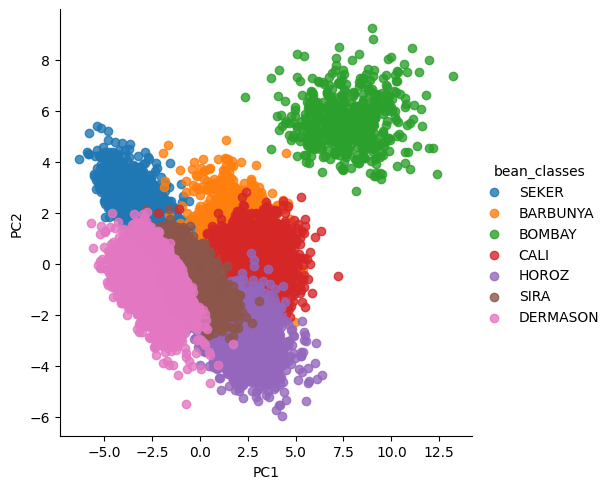

In [28]:
# 2. Plot the first two principal components colored by the bean classes
data_pcomp['bean_classes'] = classes
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='bean_classes', fit_reg=False)
plt.show()

## 6. PCA as Features

**Task 1**  
- Read through the code to make sure that you understand what’s happening. 
- Here are the steps:
    - Transform the original data by projecting it onto the first four principal axes. We chose four PCs because we previously found that they contain 95% of the variance in the original data
    - Split the data into 67% training and 33% testing sets
    - Use the transformed training data to fit an SVM model
    - Print out the average likelihood score for the testing data
    - Re-split the original 16 standardized features into training and test sets
    - Fit the same SVM model on the training set with all 16 features
    - Print out the average likelihood score for the test data
- Notice that the score for the model using the first 4 principal components is higher than for the model that was fit with the 16 original features. 
- We only needed 1/4 of the data to get even better model performance!

In [30]:
data_matrix_standardized = pd.read_csv('data_matrix_standardized.csv')
classes = pd.read_csv('classes.csv')

# We will use the classes as y
y = classes.Class.astype('category').cat.codes

# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=4) 
X = pca_1.fit_transform(data_matrix_standardized) 

# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 

# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')

# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)

# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)

# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')


Score for model with 4 PCA features: 0.8472840605520926
Score for model with original features: 0.9171861086375779


## 7. PCA for Images I

**Task 1**  
- Let’s start by downloading the Olivetti Faces dataset from scikit-learn. 
- Standardize the image dataset by subtracting the mean and dividing by the standard deviation.

<br>

**Task 2**  
- Each row from the faces dataset is a flattened image. 
- Each feature is a pixel in the image. 
- Find the side length of each square image by taking the square root of the number of features (pixels). 
- Uncomment the code to print the number of pixels per image and per side-length.

<br>

**Task 3**  
- Copy and paste the following plotting code to the bottom and see the first 15 faces in the dataset.
    ```python	
    # Create an empty 10x8 plot
    fig = plt.figure(figsize=(10, 8))

    # Observe the first 15 images.
    for i in range(15):

        # Create subplot, remove x and y ticks, and add title
        ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        ax.set_title(f'Image of Face: #{i}')

        # Get an image from a row based on the current value of i
        face_image = faces_standardized[i]

        # Reshape this image into side_length x side_length 
        face_image_reshaped = face_image.reshape(side_length, side_length)

        # Show the image
        ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
    plt.show()
    ```

In [33]:
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']

# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\larsk\scikit_learn_data


In [34]:
# 2. Find the side length of a square image
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')

Number of features(pixels) per image: 4096
Square image side length: 64


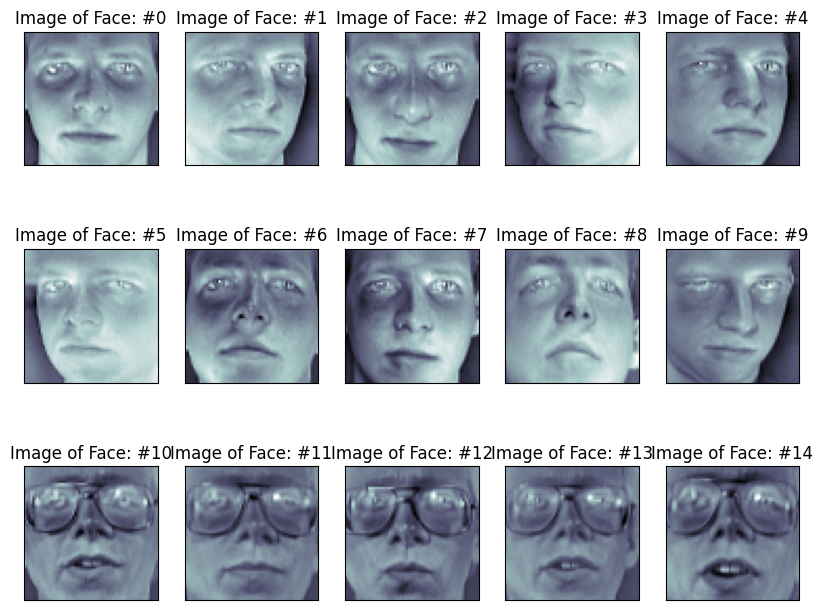

In [35]:
# 3. Paste the plotting code below:
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):
    
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')
    
    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]
    
    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)
    
    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()

## 8. PCA for Images II

**Task 1**  
- Inspect the eigenfaces. 
- Notice how they each depict some of the common distinctive features in the various faces.
- Now, scroll down in the plotting output to view the reconstructed faces. 
- These were constructed using only 400 transformed features. 
- Notice that they look almost identical to the original faces, despite requiring only .9% as much data to store them!

<br>

**Task 2**  
- Now, change the number of components to `40` instead of `400` and press “Run”. 
- Scroll down to view the reconstructed faces. Notice how we get a decent reconstruction, but lose some detail and clarity by reducing the feature space this much (only 0.09% of the original).

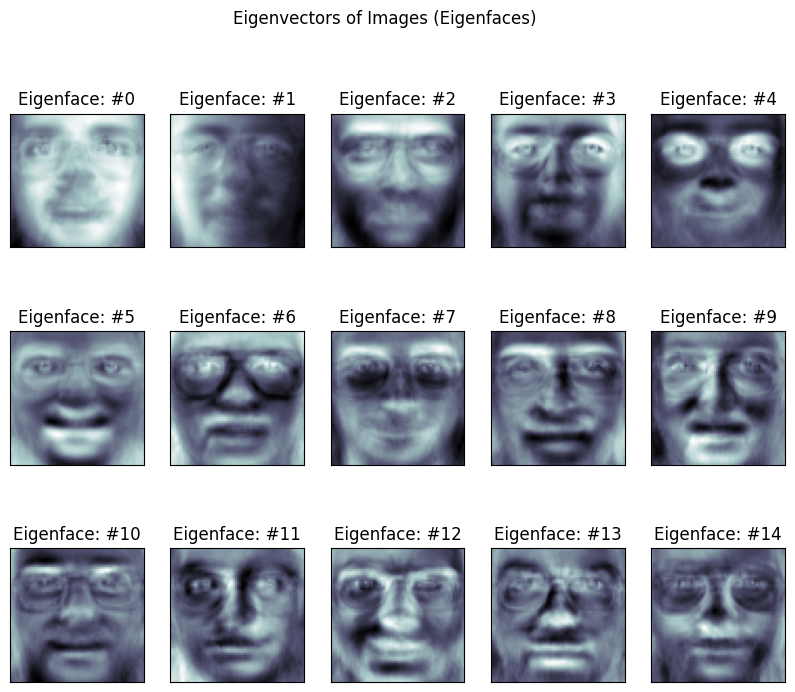

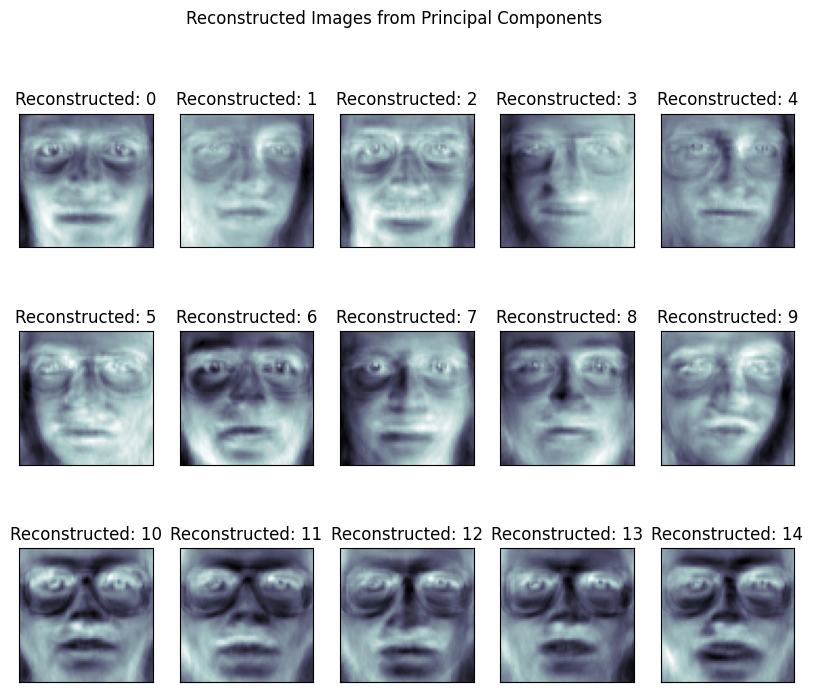

In [37]:
faces_standardized = pd.read_csv('./faces_standardized.csv').values

# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=40) 
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]
    
    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)
    
    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')
    
    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()